In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
Phil = pd.read_csv('cleaned_files.csv', low_memory=False)

In [3]:
Weather = pd.read_csv("Weather_data_clean.csv", low_memory=False)

In [4]:
Phil['trip_id'].nunique()

1679150

In [5]:
Phil['trip_id'].count()

1781474

duplicates in tripID

In [6]:
# 1781474 - 1679150 = 102324 
duplicates = Phil[Phil.duplicated(subset='trip_id', keep=False)]
duplicates.count()

trip_id                204648
duration               204648
start_time             204648
end_time               204648
start_station          204648
end_station            204648
bike_id                204648
plan_duration          204648
trip_route_category    204648
passholder_type        204648
bike_type              204648
Date_s                 204648
Weekday_s              204648
Hour_s                 204648
Date_e                 204648
Weekday_e              204648
Hour_e                 204648
start_coordinates      204648
end_coordinates        204648
dtype: int64

In [7]:
# Specify the subset of columns to check for duplicates
subset_cols = ['trip_id', 'bike_id', 'start_coordinates']

# Group the duplicates by the subset of columns and count the number of occurrences
duplicate_counts = duplicates.groupby(subset_cols).size().reset_index(name='duplicate_count')

print("Duplicate Groups:")
duplicate_counts['duplicate_count'].unique()

Duplicate Groups:


array([2], dtype=int64)

In [8]:
duplicate_counts

,trip_id,bike_id,start_coordinates,duplicate_count
0,418016501,2537,"39.945171,-75.159927",2
1,418016502,2697,"39.953899,-75.169022",2
2,418016503,14567,"39.95134,-75.173943",2
3,418016504,19971,"39.950119,-75.144722",2
4,418016505,16748,"39.955231,-75.166199",2
...,...,...,...,...
102319,428365209,14638,"39.95134,-75.16758",2
102320,428365227,19091,"39.943909,-75.167351",2
102321,428365230,18745,"39.943909,-75.167351",2
102322,428365316,11887,"39.96006,-75.171982",2


In [9]:
trip_ids = [428365170, 418016501, 418016505, 428365209, 428647877]
dupli = Phil[Phil['trip_id'].isin(trip_ids)]
dupli

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_coordinates,end_coordinates
496622,418016505,10,2021-09-01 01:30:00,2021-09-01 01:40:00,3201,3104,16748,30,One Way,Indego30,electric,2021-09-01,2,1,2021-09-01,2,1,"39.955231,-75.166199","39.96664,-75.192093"
496626,418016501,7,2021-09-01 01:48:00,2021-09-01 01:55:00,3007,3154,2537,30,One Way,Indego30,standard,2021-09-01,2,1,2021-09-01,2,1,"39.945171,-75.159927","39.95924,-75.158211"
583710,428647877,1440,2021-09-26 17:45:00,2021-10-01 04:04:00,3058,3210,19561,30,One Way,Indego30,electric,2021-09-26,6,17,2021-10-01,4,4,"39.967159,-75.170013","39.984921,-75.156677"
598894,428365209,19,2021-09-30 23:42:00,2021-10-01 00:01:00,3202,3100,14638,30,One Way,Indego30,standard,2021-09-30,3,23,2021-10-01,4,0,"39.95134,-75.16758","39.927769,-75.151031"
598910,428365170,3,2021-09-30 23:58:00,2021-10-01 00:01:00,3115,3075,21618,30,One Way,Indego30,electric,2021-09-30,3,23,2021-10-01,4,0,"39.97263,-75.167572","39.967178,-75.161247"
598946,418016505,10,2021-09-01 01:30:00,2021-09-01 01:40:00,3201,3104,16748,30,One Way,Indego30,electric,2021-09-01,2,1,2021-09-01,2,1,"39.955231,-75.166199","39.96664,-75.192093"
598950,418016501,7,2021-09-01 01:48:00,2021-09-01 01:55:00,3007,3154,2537,30,One Way,Indego30,standard,2021-09-01,2,1,2021-09-01,2,1,"39.945171,-75.159927","39.95924,-75.158211"
686034,428647877,1440,2021-09-26 17:45:00,2021-10-01 04:04:00,3058,3210,19561,30,One Way,Indego30,electric,2021-09-26,6,17,2021-10-01,4,4,"39.967159,-75.170013","39.984921,-75.156677"
701218,428365209,19,2021-09-30 23:42:00,2021-10-01 00:01:00,3202,3100,14638,30,One Way,Indego30,standard,2021-09-30,3,23,2021-10-01,4,0,"39.95134,-75.16758","39.927769,-75.151031"
701234,428365170,3,2021-09-30 23:58:00,2021-10-01 00:01:00,3115,3075,21618,30,One Way,Indego30,electric,2021-09-30,3,23,2021-10-01,4,0,"39.97263,-75.167572","39.967178,-75.161247"


duration = 1440min and starttime and endtime disbalanced maybe there are more

In [10]:
duplii = Phil[Phil['trip_id'] == 428647877]
duplii

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_coordinates,end_coordinates
583710,428647877,1440,2021-09-26 17:45:00,2021-10-01 04:04:00,3058,3210,19561,30,One Way,Indego30,electric,2021-09-26,6,17,2021-10-01,4,4,"39.967159,-75.170013","39.984921,-75.156677"
686034,428647877,1440,2021-09-26 17:45:00,2021-10-01 04:04:00,3058,3210,19561,30,One Way,Indego30,electric,2021-09-26,6,17,2021-10-01,4,4,"39.967159,-75.170013","39.984921,-75.156677"


In [11]:
Phil = Phil.drop_duplicates(subset='trip_id', keep='first')
Phil

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_coordinates,end_coordinates
0,365184634,15,2021-01-01 00:05:00,2021-01-01 00:20:00,3125,3157,14542,30,One Way,Indego30,standard,2021-01-01,4,0,2021-01-01,4,0,"39.943909,-75.167351","39.925449,-75.159538"
1,365184633,14,2021-01-01 00:06:00,2021-01-01 00:20:00,3022,3010,5294,30,One Way,Indego30,standard,2021-01-01,4,0,2021-01-01,4,0,"39.95472,-75.183228","39.947109,-75.166183"
2,365184632,33,2021-01-01 00:07:00,2021-01-01 00:40:00,3066,3201,14586,30,One Way,Indego30,standard,2021-01-01,4,0,2021-01-01,4,0,"39.94561,-75.173477","39.955231,-75.166199"
3,365184631,9,2021-01-01 00:13:00,2021-01-01 00:22:00,3045,3034,14683,30,One Way,Indego30,standard,2021-01-01,4,0,2021-01-01,4,0,"39.947922,-75.162369","39.933151,-75.162483"
4,365184630,13,2021-01-01 00:37:00,2021-01-01 00:50:00,3052,3040,3330,30,One Way,Indego30,standard,2021-01-01,4,0,2021-01-01,4,0,"39.947319,-75.156952","39.962891,-75.166061"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781469,579499101,23,2022-12-31 23:44:00,2023-01-01 00:07:00,3244,3287,14674,30,One Way,Indego30,standard,2022-12-31,5,23,2023-01-01,6,0,"39.938648,-75.16674","39.943668,-75.216057"
1781470,579499099,17,2022-12-31 23:45:00,2023-01-01 00:02:00,3295,3054,23113,30,One Way,Indego30,electric,2022-12-31,5,23,2023-01-01,6,0,"39.950279,-75.160271","39.962502,-75.174202"
1781471,579499097,8,2022-12-31 23:51:00,2022-12-31 23:59:00,3255,3046,16897,30,One Way,Indego30,electric,2022-12-31,5,23,2022-12-31,5,23,"39.950951,-75.164383","39.950119,-75.144722"
1781472,579499095,23,2022-12-31 23:54:00,2023-01-01 00:16:00,3255,3113,22646,30,One Way,Indego30,electric,2022-12-31,5,23,2023-01-01,6,0,"39.950951,-75.164383","39.97472,-75.197807"


In [12]:
Phil['Date_s'] = pd.to_datetime(Phil['Date_s'])

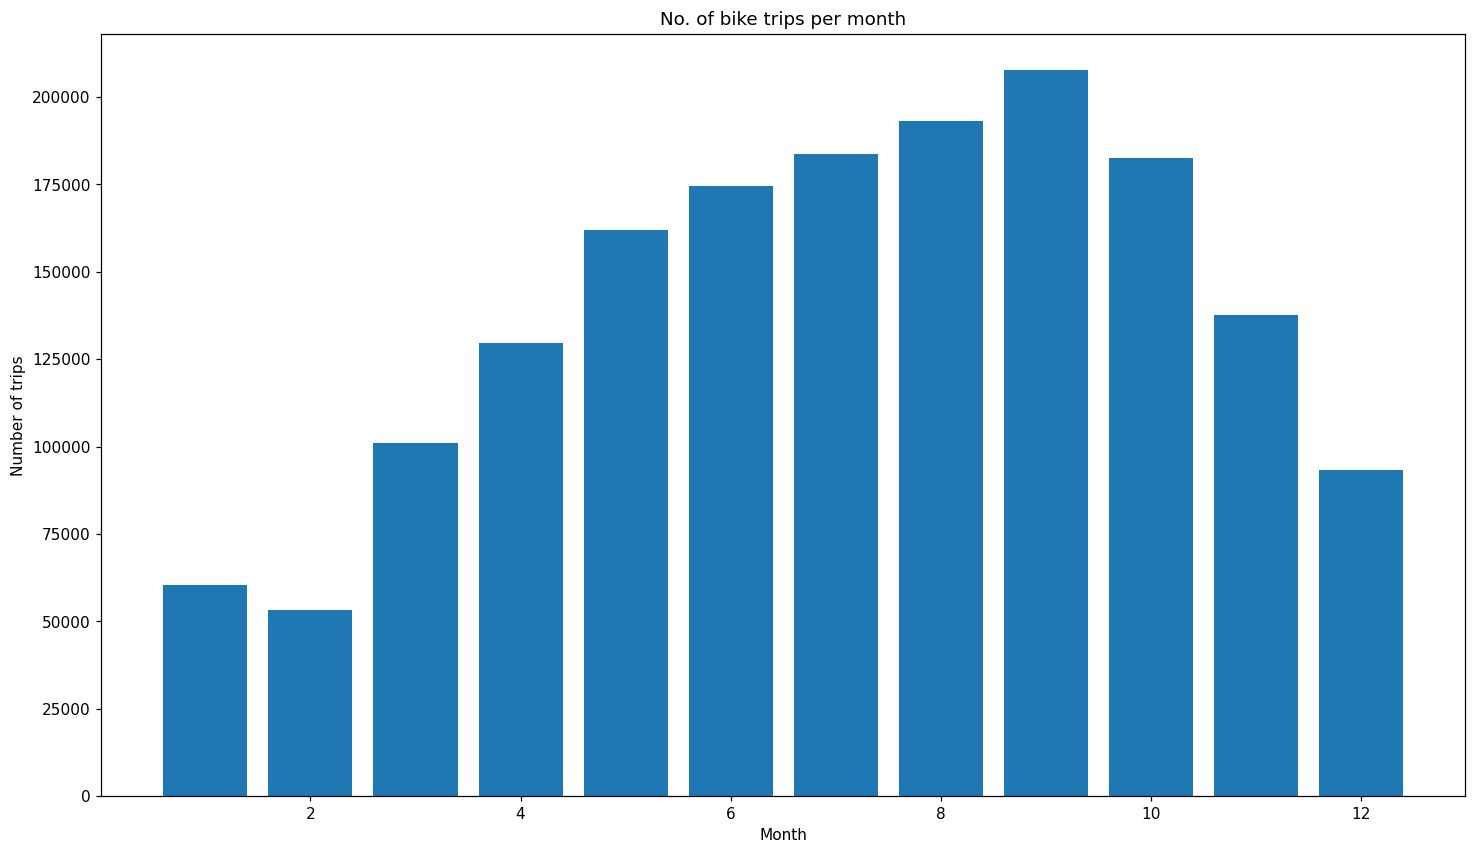

In [13]:
# usage per month
month = Phil.groupby(Phil['Date_s'].dt.month)['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16,9), dpi = 110)
ax.bar(month.index, month)
plt.title("No. of bike trips per month")
plt.xlabel("Month")
plt.ylabel("Number of trips")

plt.show()

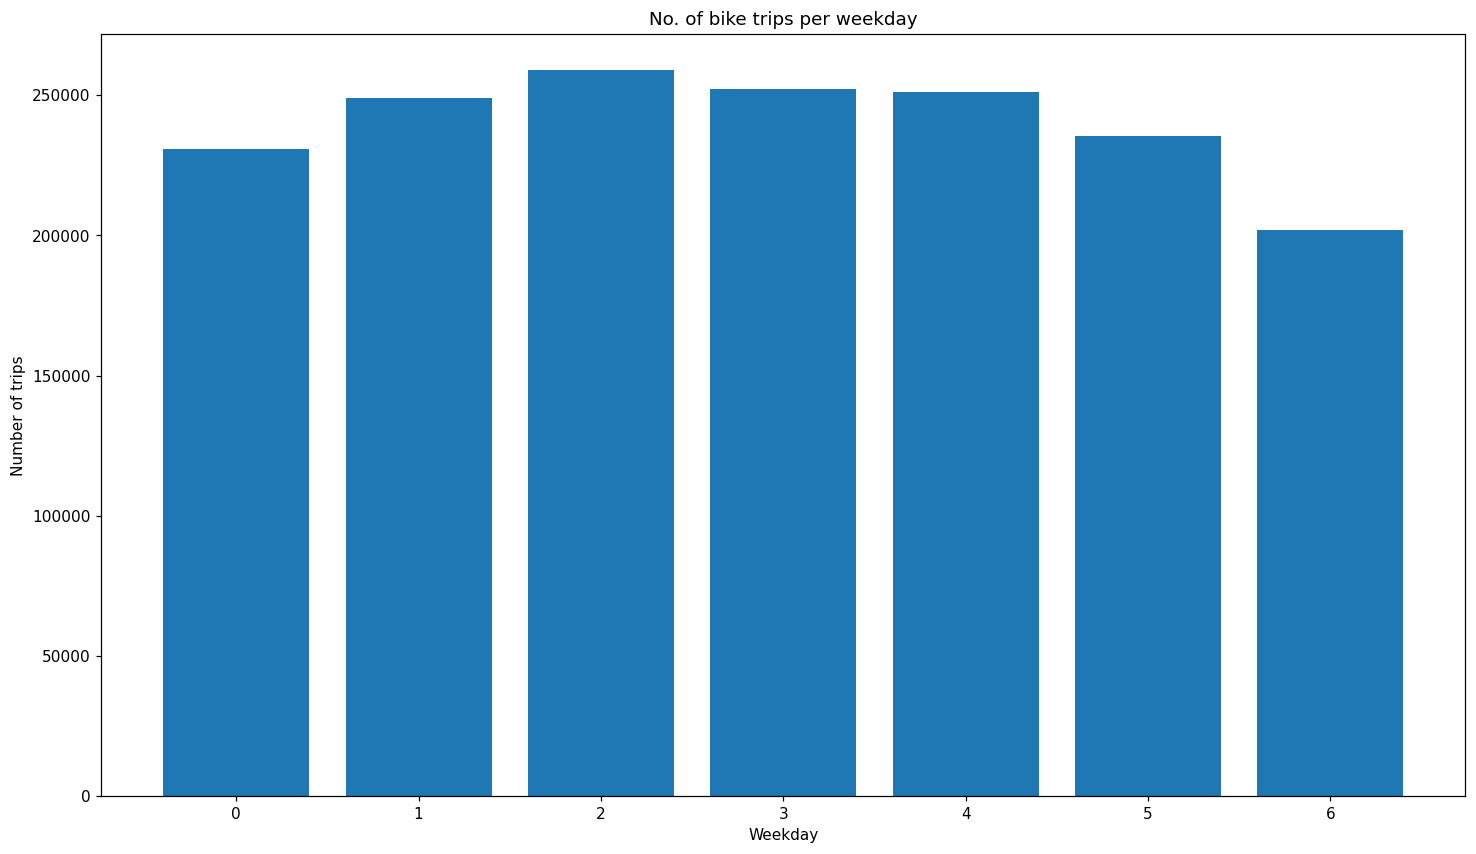

In [14]:
# usage per weekday
weekday = Phil.groupby(['Weekday_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16,9), dpi = 110)
ax.bar(weekday.index, weekday)
plt.title("No. of bike trips per weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of trips")
plt.show()

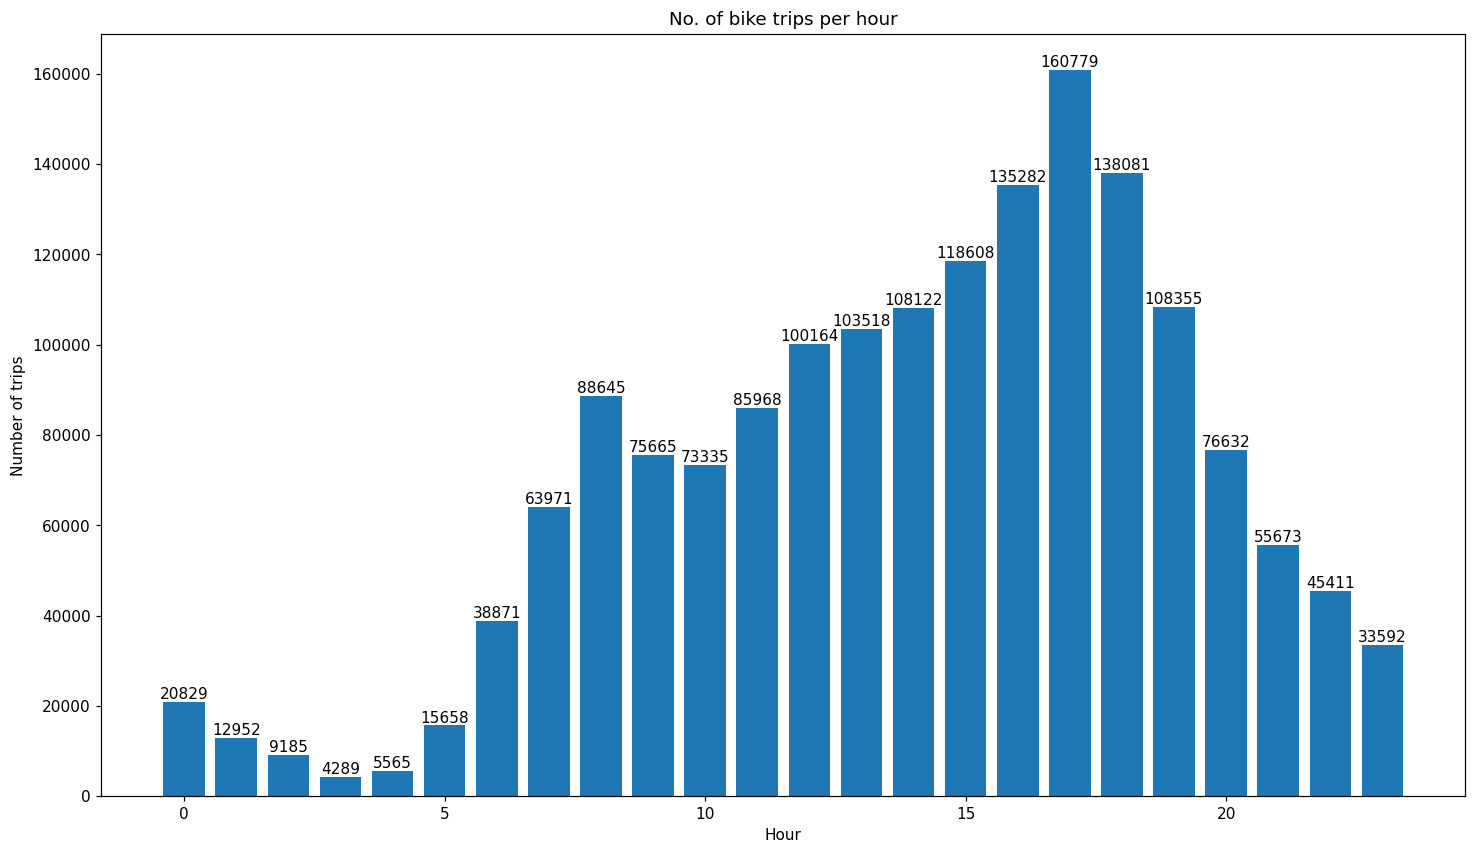

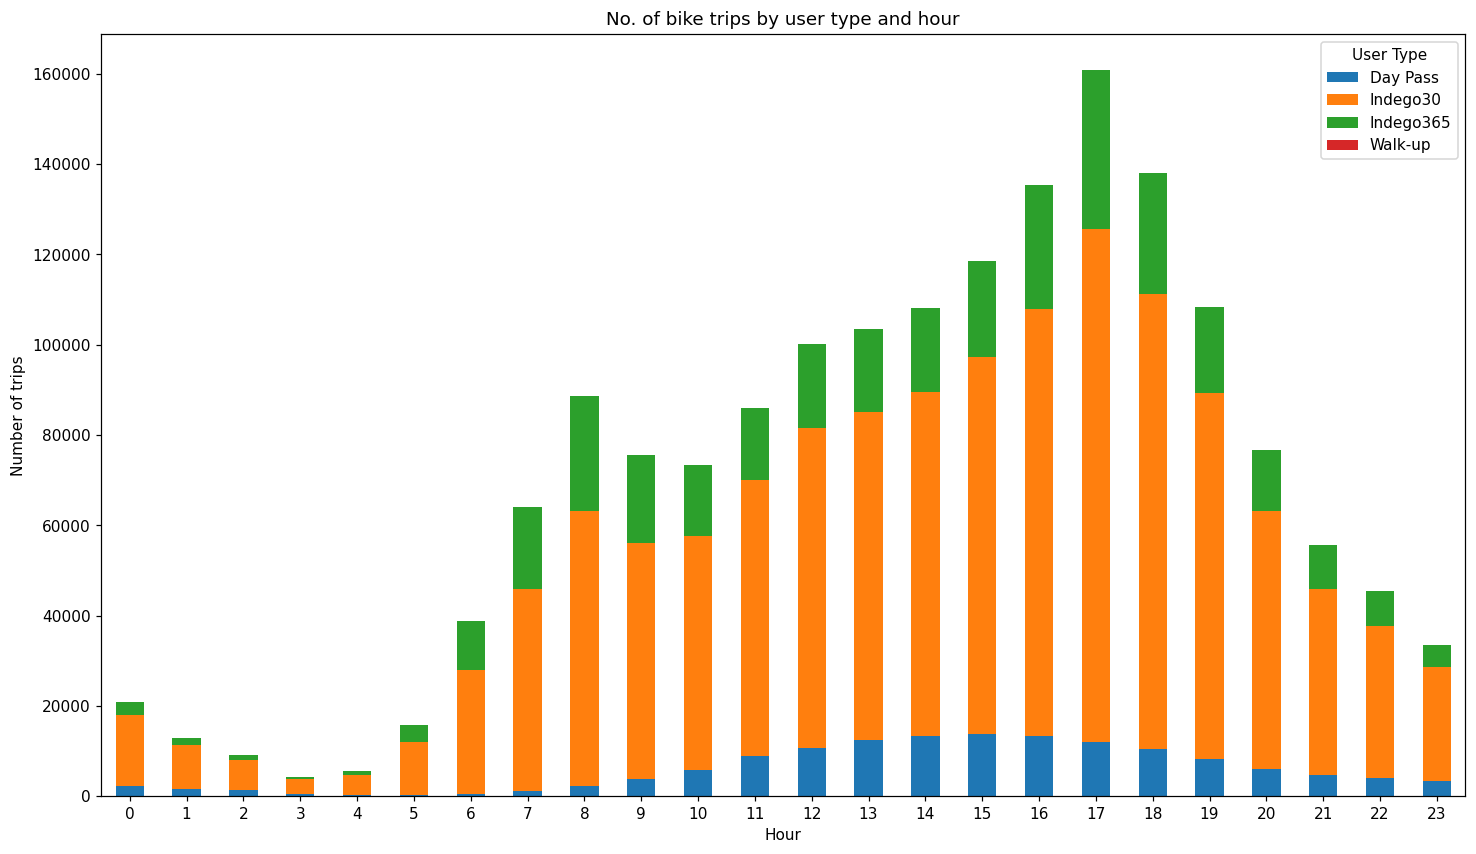

In [15]:
# Usage per hour
hour = Phil.groupby(['Hour_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.bar(hour.index, hour)
plt.title("No. of bike trips per hour")
plt.xlabel("Hour")
plt.ylabel("Number of trips")

# Add labels to the bars
for i, v in enumerate(hour):    
    ax.text(i, v + 50, str(v), ha='center', va='bottom') 
# i: index of hour,  v: value of trip_id,  ha: horizintal alignment,  va: vertical alignment
plt.show()

# stacked bar chart
grouped = Phil.groupby(['Hour_s', 'passholder_type'])['trip_id'].nunique().unstack()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
grouped.plot(kind='bar', stacked=True, ax=ax)
plt.xticks(rotation = 0)
plt.title("No. of bike trips by user type and hour")
plt.xlabel("Hour")
plt.ylabel("Number of trips")
plt.legend(title='User Type')

plt.show()

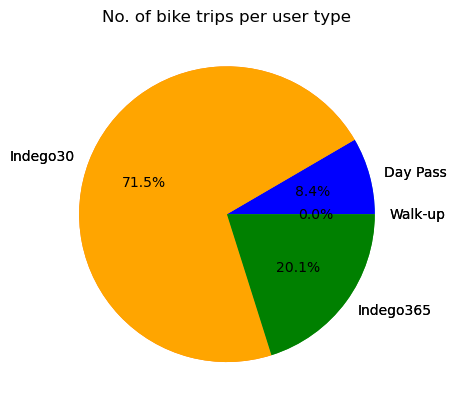

In [16]:
user = Phil.groupby(['passholder_type'])['trip_id'].nunique()

colors = ['blue', 'orange', 'green', 'red']
fig, ax = plt.subplots()
ax.pie(user, labels=user.index)
ax.pie(user, labels=user.index, autopct='%1.1f%%', colors=colors)
plt.title("No. of bike trips per user type")
plt.show()

In [17]:
# Distribution of passholder type and bike type
pivot_table = Phil.pivot_table(index='passholder_type', columns='bike_type', aggfunc='size')
pivot_table

bike_type,electric,standard
passholder_type,,
Day Pass,56911,84141
Indego30,458208,741845
Indego365,109374,228659
Walk-up,5,7


for later: dividing in Day Pass/Walk-up and Indego30/Indego365
           -> presumption that group 1 are tourists

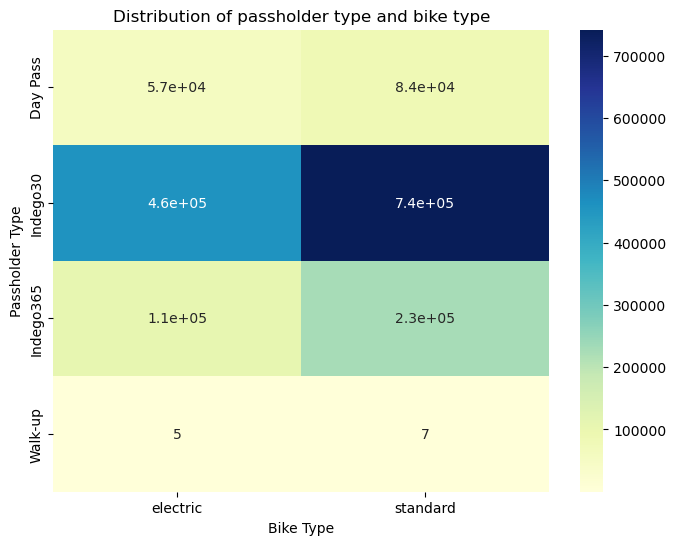

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu') #from yellow for low values, through green, to dark blue for high values.
plt.title('Distribution of passholder type and bike type')
plt.xlabel('Bike Type')
plt.ylabel('Passholder Type')
plt.show()

In [19]:
Phil['duration'].mean()
Phil.groupby(['passholder_type', 'bike_type'])['duration'].mean()
Phil.groupby(['bike_type', 'passholder_type'])['duration'].mean().unstack()

passholder_type,Day Pass,Indego30,Indego365,Walk-up
bike_type,,,,
electric,39.022157,16.762134,12.997970,86.800000
standard,37.657515,17.791417,13.022077,41.428571


In [23]:
# how many eclecttric and standard bikes
Phil['bike_id'].nunique()
Phil.groupby(['bike_type'])['bike_id'].nunique()

bike_type
electric    1204
standard    1169
Name: bike_id, dtype: int64

In [24]:
# rides with the different bikes, maybe important for maintenance and idle time
Phil.groupby(['bike_type'])['bike_id'].count()
Phil.groupby(['bike_type'])['trip_id'].count()

bike_type
electric     624498
standard    1054652
Name: trip_id, dtype: int64

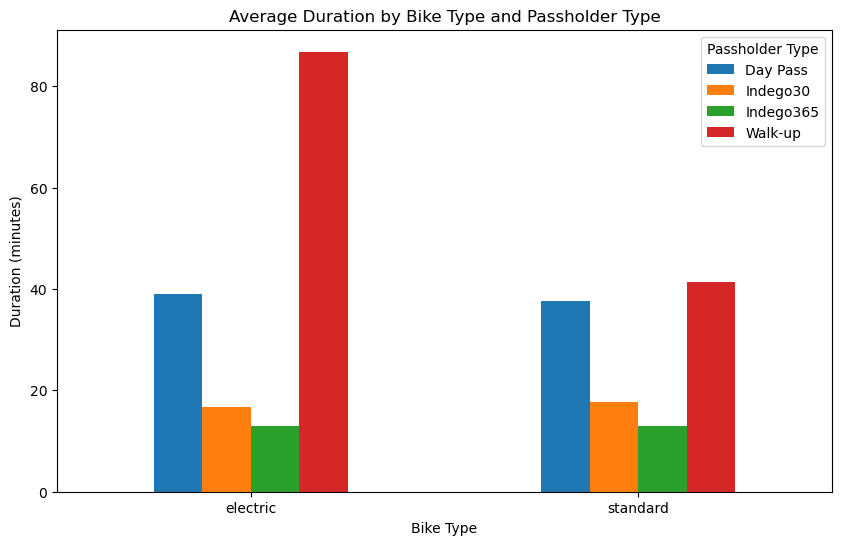

In [29]:
dura = Phil.groupby(['bike_type', 'passholder_type'])['duration'].mean().unstack()

# average durtion by biky type and passholder type
ax = dura.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Duration (minutes)')
ax.set_xlabel('Bike Type')
ax.set_title('Average Duration by Bike Type and Passholder Type')
ax.legend(title='Passholder Type')

plt.xticks(rotation=0)
plt.show()

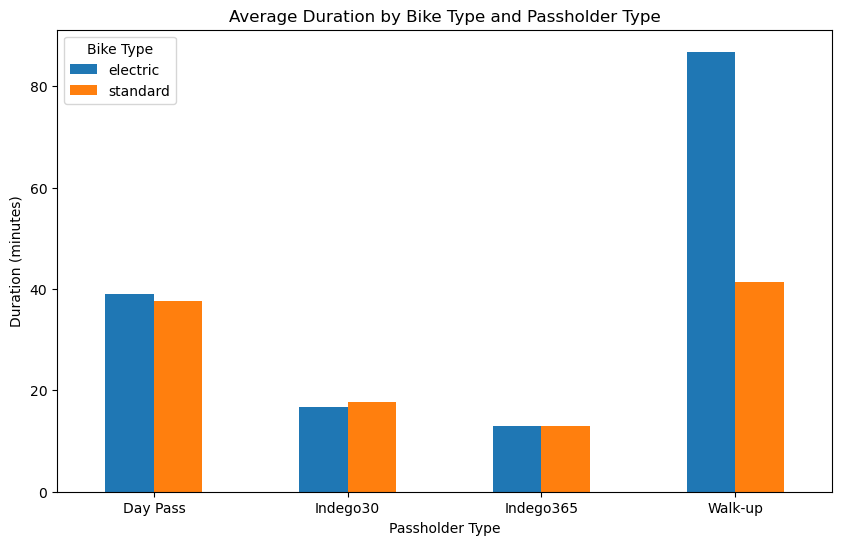

In [30]:
ura = Phil.groupby(['passholder_type', 'bike_type'])['duration'].mean().unstack()

# average durtion by biky type and passholder type
ax = ura.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Duration (minutes)')
ax.set_xlabel('Passholder Type')
ax.set_title('Average Duration by Bike Type and Passholder Type')
ax.legend(title='Bike Type')

plt.xticks(rotation=0)
plt.show()

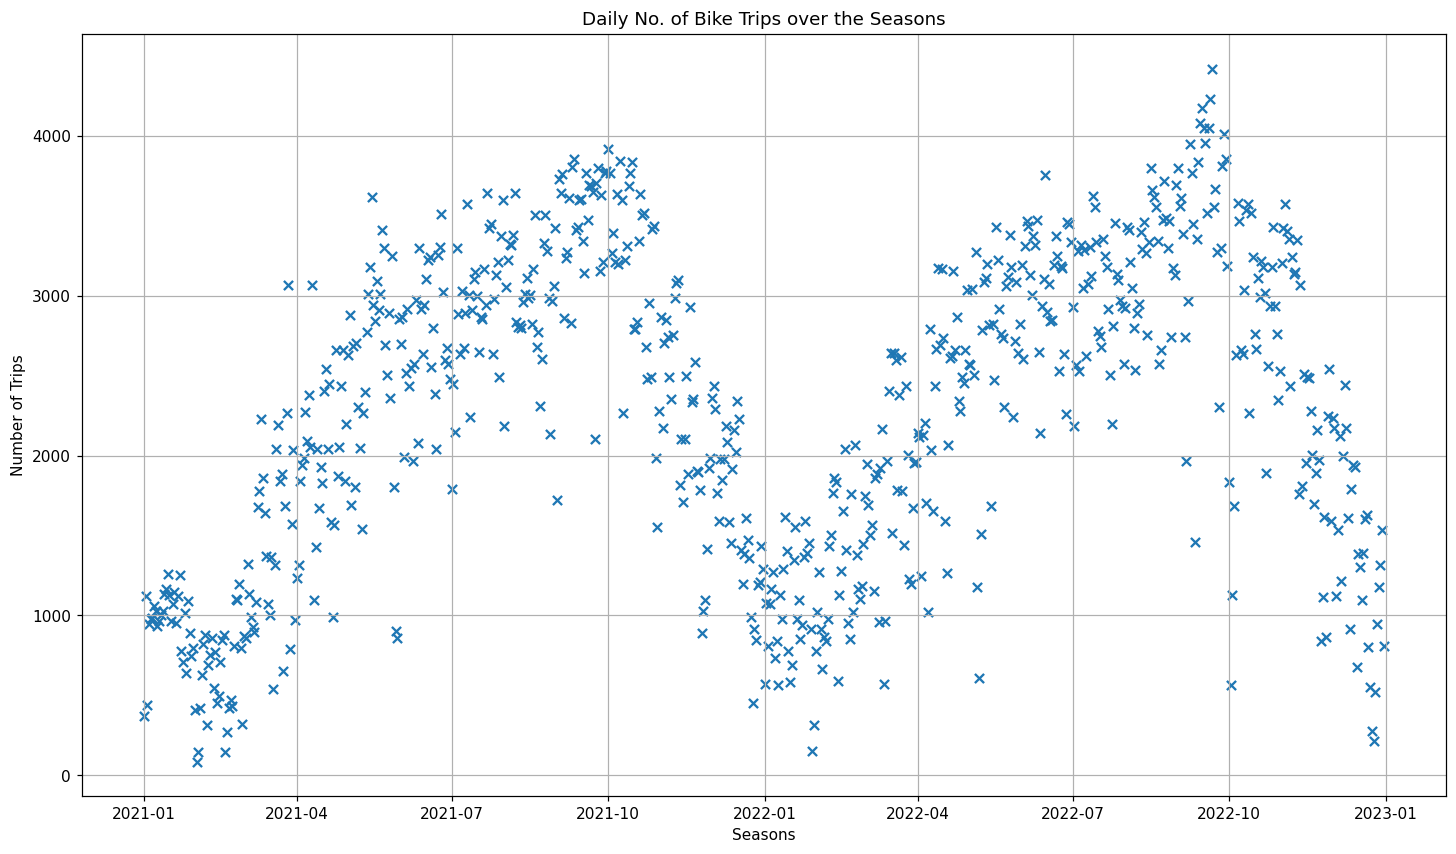

In [31]:
daily_trips = Phil.groupby('Date_s')['trip_id'].count()

### daily No. of bike trips over the year as scatter
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.scatter(daily_trips.index, daily_trips.values, marker="x")
plt.grid()
plt.title("Daily No. of Bike Trips over the Seasons")
plt.xlabel("Seasons")
plt.ylabel("Number of Trips")
plt.show()

In [33]:
Weather['Date'].dtype

dtype('O')

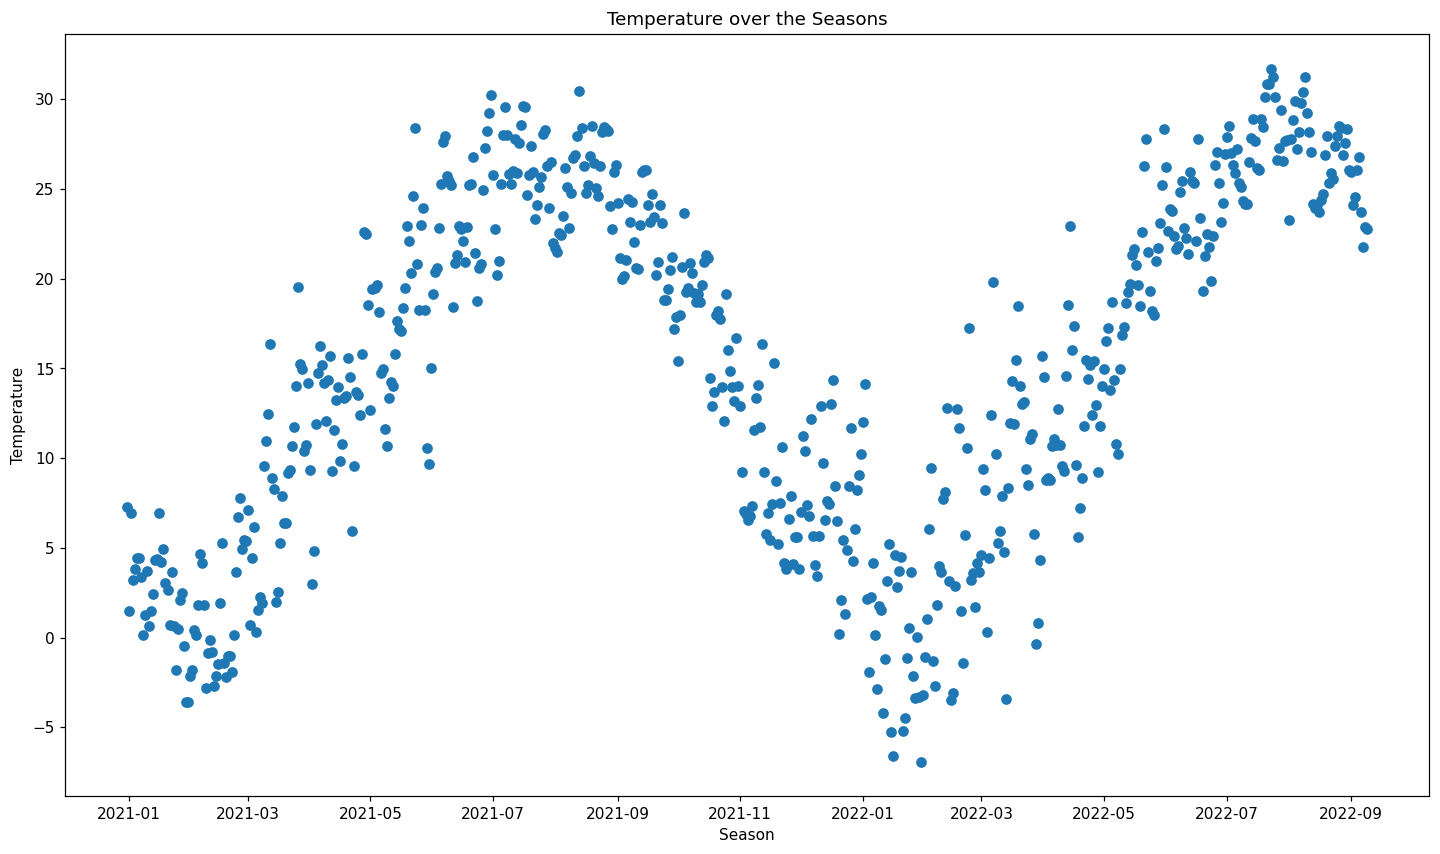

In [34]:
Weather['Date']=pd.to_datetime(Weather['Date'])
daily_weather = Weather.groupby(['Date'])['temperature'].mean()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.scatter(daily_weather.index, daily_weather, marker = "o")
plt.title('Temperature over the Seasons')
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.show()

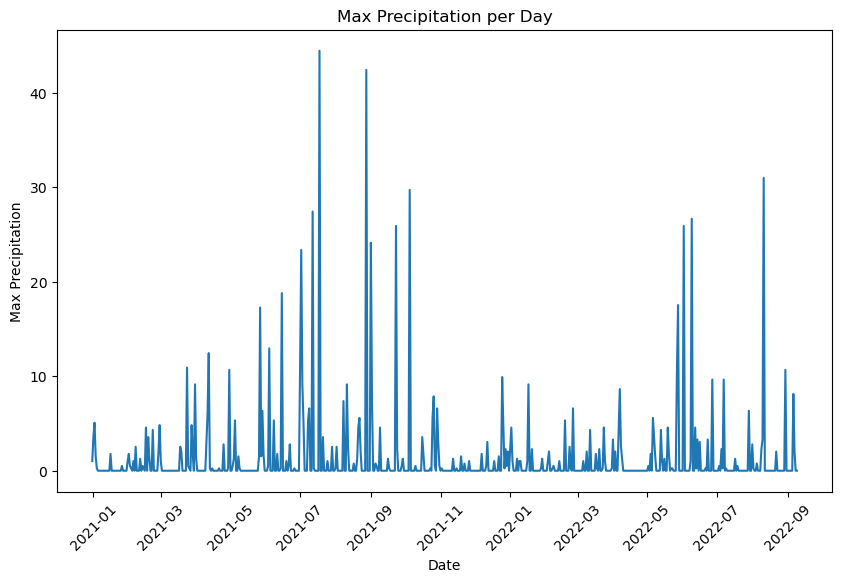

In [149]:
daily_mean_precipitation = Weather.groupby('Date')['precipitation'].max()

# line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(daily_mean_precipitation.index, daily_mean_precipitation.values)
plt.xlabel('Date')
plt.ylabel('Max Precipitation')
plt.title('Max Precipitation per Day')
plt.xticks(rotation=45)
plt.show()

not complete yet